In [286]:
# import the necessary libraries
import pandas as pd
pd.set_option('display.expand_frame_repr', False)  # this is to observe all columns for dataframes
pd.set_option('display.max_rows', 10000)
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import seaborn
!pip install pmdarima  # this is for our 'creativity' part, time series analysis

Populating the interactive namespace from numpy and matplotlib


# Task 1: Acquire, preprocess, and analyze the data

In [287]:
# Load the most recent dataset into Pandas dataframe
url_1 = 'https://raw.githubusercontent.com/google-research/open-covid-19-data/master/data/exports/search_trends_symptoms_dataset/United%20States%20of%20America/2020_US_weekly_symptoms_dataset.csv'
df_1 = pd.read_csv(url_1, index_col=['date'])
df_1.index = pd.to_datetime(df_1.index).strftime('%Y-%m-%d') # reformat date into datetime
df_1.head()

,open_covid_region_code,country_region_code,country_region,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,symptom:Abdominal obesity,symptom:Abdominal pain,symptom:Acne,symptom:Actinic keratosis,symptom:Acute bronchitis,symptom:Adrenal crisis,symptom:Ageusia,symptom:Alcoholism,symptom:Allergic conjunctivitis,symptom:Allergy,symptom:Amblyopia,symptom:Amenorrhea,symptom:Amnesia,symptom:Anal fissure,symptom:Anaphylaxis,symptom:Anemia,symptom:Angina pectoris,symptom:Angioedema,symptom:Angular cheilitis,symptom:Anosmia,symptom:Anxiety,symptom:Aphasia,symptom:Aphonia,symptom:Apnea,symptom:Arthralgia,symptom:Arthritis,symptom:Ascites,symptom:Asperger syndrome,symptom:Asphyxia,symptom:Asthma,symptom:Astigmatism,symptom:Ataxia,symptom:Atheroma,...,symptom:Throat irritation,symptom:Thrombocytopenia,symptom:Thyroid nodule,symptom:Tic,symptom:Tinnitus,symptom:Tonsillitis,symptom:Toothache,symptom:Tremor,symptom:Trichoptilosis,symptom:Tumor,symptom:Type 2 diabetes,symptom:Unconsciousness,symptom:Underweight,symptom:Upper respiratory tract infection,symptom:Urethritis,symptom:Urinary incontinence,symptom:Urinary tract infection,symptom:Urinary urgency,symptom:Uterine contraction,symptom:Vaginal bleeding,symptom:Vaginal discharge,symptom:Vaginitis,symptom:Varicose veins,symptom:Vasculitis,symptom:Ventricular fibrillation,symptom:Ventricular tachycardia,symptom:Vertigo,symptom:Viral pneumonia,symptom:Visual acuity,symptom:Vomiting,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-06,US-AK,US,United States,Alaska,US-AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.69,NaN,NaN,NaN,NaN,NaN,12.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.31,NaN,NaN,NaN,11.10,...,NaN,NaN,15.86,NaN,NaN,NaN,NaN,NaN,11.90,NaN,NaN,NaN,NaN,18.84,13.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.08,9.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.28,NaN,NaN
2020-01-13,US-AK,US,United States,Alaska,US-AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.56,NaN,NaN,NaN,NaN,NaN,12.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.20,NaN,NaN,NaN,13.20,...,NaN,NaN,12.24,NaN,NaN,NaN,NaN,NaN,7.84,NaN,NaN,NaN,NaN,16.83,13.01,NaN,NaN,7.65,NaN,NaN,NaN,NaN,NaN,15.30,8.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.26,NaN,NaN
2020-01-20,US-AK,US,United States,Alaska,US-AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.90,NaN,NaN,NaN,10.49,...,NaN,NaN,17.66,NaN,NaN,NaN,NaN,NaN,15.27,NaN,NaN,NaN,NaN,18.40,12.14,NaN,NaN,7.54,NaN,NaN,NaN,NaN,NaN,10.30,16.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.48,NaN,NaN
2020-01-27,US-AK,US,United States,Alaska,US-AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.31,7.47,NaN,NaN,NaN,NaN,15.67,NaN,NaN,NaN,NaN,NaN,NaN,7.47,NaN,NaN,NaN,7.65,NaN,NaN,NaN,NaN,NaN,12.03,NaN,NaN,NaN,11.84,...,NaN,NaN,12.76,NaN,NaN,NaN,NaN,NaN,9.84,NaN,NaN,NaN,NaN,20.41,17.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.93,NaN,NaN
2020-02-03,US-AK,US,United States,Alaska,US-AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.81,NaN,NaN,NaN,NaN,NaN,13.87,NaN,NaN,NaN,NaN,NaN,NaN,8.06,NaN,NaN,NaN,12.56,NaN,NaN,NaN,NaN,NaN,14.24,NaN,NaN,NaN,9.75,...,NaN,NaN,16.68,NaN,NaN,NaN,NaN,NaN,10.68,NaN,NaN,NaN,NaN,20.62,16.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.24,10.68,NaN,NaN,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.93,NaN,NaN


In [288]:
# Remove symptoms for which no search data is available
df_1 = df_1.dropna(axis=1, how='all')
df_1.head()

,open_covid_region_code,country_region_code,country_region,sub_region_1,sub_region_1_code,symptom:Adrenal crisis,symptom:Ageusia,symptom:Allergic conjunctivitis,symptom:Amblyopia,symptom:Amenorrhea,symptom:Angular cheilitis,symptom:Anosmia,symptom:Aphonia,symptom:Ascites,symptom:Asphyxia,symptom:Atheroma,symptom:Auditory hallucination,symptom:Balance disorder,symptom:Beau's lines,symptom:Bleeding on probing,symptom:Burning Chest Pain,symptom:Burning mouth syndrome,symptom:Cataplexy,symptom:Chancre,symptom:Chorea,symptom:Cleft lip and cleft palate,symptom:Clouding of consciousness,symptom:Compulsive hoarding,symptom:Crackles,symptom:Crepitus,symptom:Croup,symptom:Cyanosis,symptom:Depersonalization,symptom:Developmental disability,symptom:Dysautonomia,symptom:Dysgeusia,symptom:Dyspareunia,symptom:Dystonia,symptom:Dysuria,symptom:Epiphora,...,symptom:Osteophyte,symptom:Papule,symptom:Paranoia,symptom:Pericarditis,symptom:Petechia,symptom:Photodermatitis,symptom:Photophobia,symptom:Photopsia,symptom:Pleurisy,symptom:Polycythemia,symptom:Polydipsia,symptom:Polyuria,symptom:Postural orthostatic tachycardia syndrome,symptom:Ptosis,symptom:Pulmonary edema,symptom:Rectal pain,symptom:Rectal prolapse,symptom:Renal colic,symptom:Rheum,symptom:Round ligament pain,symptom:Rumination,symptom:Sensitivity to sound,symptom:Shallow breathing,symptom:Spasticity,symptom:Splenomegaly,symptom:Sputum,symptom:Stomach rumble,symptom:Stridor,symptom:Subdural hematoma,symptom:Tachypnea,symptom:Tenderness,symptom:Thyroid nodule,symptom:Trichoptilosis,symptom:Upper respiratory tract infection,symptom:Urethritis,symptom:Urinary urgency,symptom:Vasculitis,symptom:Ventricular fibrillation,symptom:Viral pneumonia,symptom:Yawn
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-06,US-AK,US,United States,Alaska,US-AK,12.69,NaN,NaN,NaN,12.29,NaN,NaN,NaN,NaN,10.31,11.10,8.92,11.10,7.93,11.90,NaN,12.10,12.29,28.36,12.10,18.05,NaN,NaN,8.33,12.49,25.78,10.51,12.10,16.06,NaN,7.93,7.93,14.87,15.47,8.13,...,16.66,11.30,8.72,8.13,11.10,NaN,11.50,NaN,NaN,12.89,NaN,9.12,NaN,11.30,11.30,NaN,18.24,21.02,NaN,14.28,13.68,8.13,NaN,9.12,8.33,18.24,NaN,10.31,9.91,7.93,14.28,15.86,11.90,18.84,13.88,NaN,14.08,9.91,NaN,14.28
2020-01-13,US-AK,US,United States,Alaska,US-AK,9.56,NaN,NaN,NaN,12.62,NaN,NaN,NaN,NaN,13.20,13.20,8.61,10.90,11.86,9.56,NaN,10.33,14.92,20.27,11.47,34.81,9.95,NaN,8.22,NaN,25.05,11.86,7.65,20.27,11.09,NaN,NaN,17.79,13.01,12.81,...,13.77,13.20,13.01,11.47,11.09,NaN,8.22,15.49,NaN,13.96,NaN,9.75,NaN,7.84,8.03,8.41,20.46,16.83,11.47,18.36,NaN,8.80,NaN,9.56,10.90,17.79,9.18,15.49,13.77,10.71,13.39,12.24,7.84,16.83,13.01,7.65,15.30,8.41,NaN,16.26
2020-01-20,US-AK,US,United States,Alaska,US-AK,NaN,NaN,NaN,NaN,14.17,NaN,7.36,NaN,NaN,14.90,10.49,8.28,11.78,11.96,17.66,NaN,11.22,11.04,18.03,11.59,19.14,8.83,NaN,8.28,10.49,29.99,7.73,NaN,24.11,10.12,11.04,8.46,17.85,15.82,9.75,...,14.17,13.98,18.77,8.28,10.49,NaN,10.86,13.62,NaN,12.14,8.46,8.10,NaN,10.86,8.65,7.91,18.40,11.41,9.20,15.46,13.98,8.46,NaN,9.57,12.33,25.02,8.46,14.90,9.20,12.33,12.88,17.66,15.27,18.40,12.14,7.54,10.30,16.19,NaN,17.48
2020-01-27,US-AK,US,United States,Alaska,US-AK,15.31,7.47,NaN,NaN,15.67,7.47,NaN,7.65,NaN,12.03,11.84,13.12,NaN,12.03,9.11,NaN,9.47,13.85,23.87,12.94,15.49,9.84,NaN,10.39,12.39,29.52,9.84,8.20,13.48,8.56,8.93,8.02,13.67,11.30,9.66,...,20.95,11.30,13.67,14.58,14.58,NaN,8.56,16.76,NaN,12.57,NaN,NaN,NaN,10.02,12.57,9.66,11.30,16.40,12.57,21.50,10.20,12.57,NaN,8.93,10.75,20.41,9.11,15.12,8.93,10.02,13.30,12.76,9.84,20.41,17.49,NaN,11.30,NaN,NaN,10.93
2020-02-03,US-AK,US,United States,Alaska,US-AK,8.81,NaN,NaN,NaN,13.87,8.06,NaN,12.56,NaN,14.24,9.75,8.81,13.12,NaN,9.00,7.5,14.62,14.24,21.55,15.37,13.12,NaN,NaN,10.31,9.93,39.36,10.87,9.37,16.12,8.62,9.93,11.06,20.43,16.87,NaN,...,16.12,14.81,16.12,13.12,11.62,NaN,14.81,16.49,NaN,14.24,NaN,8.62,NaN,10.12,11.06,NaN,17.24,17.62,12.93,19.68,10.50,12.56,NaN,14.43,10.87,20.62,8.43,11.43,11.81,18.18,1

In [289]:
# We can further remove regions and features that have too many missing or invalid data entries (here more than 50%)
df_1 = df_1.dropna(axis=1, thresh=len(df_1) * 0.5)
df_1.head()

,open_covid_region_code,country_region_code,country_region,sub_region_1,sub_region_1_code,symptom:Allergic conjunctivitis,symptom:Angular cheilitis,symptom:Aphonia,symptom:Auditory hallucination,symptom:Burning Chest Pain,symptom:Clouding of consciousness,symptom:Crackles,symptom:Crepitus,symptom:Depersonalization,symptom:Dysautonomia,symptom:Epiphora,symptom:Hemolysis,symptom:Laryngitis,symptom:Myoclonus,symptom:Nasal polyp,symptom:Polydipsia,symptom:Pulmonary edema,symptom:Rectal pain,symptom:Rumination,symptom:Shallow breathing,symptom:Stridor,symptom:Urinary urgency,symptom:Ventricular fibrillation,symptom:Viral pneumonia
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-06,US-AK,US,United States,Alaska,US-AK,NaN,NaN,NaN,8.92,NaN,NaN,8.33,12.49,12.10,NaN,8.13,9.12,14.47,10.51,9.52,NaN,11.30,NaN,13.68,NaN,10.31,NaN,9.91,NaN
2020-01-13,US-AK,US,United States,Alaska,US-AK,NaN,NaN,NaN,8.61,NaN,9.95,8.22,NaN,7.65,11.09,12.81,NaN,11.28,8.41,7.65,NaN,8.03,8.41,NaN,NaN,15.49,7.65,8.41,NaN
2020-01-20,US-AK,US,United States,Alaska,US-AK,NaN,NaN,NaN,8.28,NaN,8.83,8.28,10.49,NaN,10.12,9.75,NaN,16.38,7.73,17.48,8.46,8.65,7.91,13.98,NaN,14.90,7.54,16.19,NaN
2020-01-27,US-AK,US,United States,Alaska,US-AK,NaN,7.47,7.65,13.12,NaN,9.84,10.39,12.39,8.20,8.56,9.66,8.93,11.30,NaN,NaN,NaN,12.57,9.66,10.20,NaN,15.12,NaN,NaN,NaN
2020-02-03,US-AK,US,United States,Alaska,US-AK,NaN,8.06,12.56,8.81,7.5,NaN,10.31,9.93,9.37,8.62,NaN,NaN,15.93,12.56,9.93,NaN,11.06,NaN,10.50,NaN,11.43,NaN,10.68,10.5


In [306]:
## Remove rows with date before March 1st 2020

## since date is used as index, we have to create a temporary column of date
#df_1['tmpdate'] = df_1.index

## change the column to datetime
#df_1['tmpdate'] = pd.to_datetime(df_1['tmpdate'])

## remove rows with date before March 1st 2020
#df_1 = df_1[~(df_1['tmpdate'] < '2020-03-01')

## remove temporary column
#del df_1['tmpdate']

#df_1

## Normalization

Since there is an unknown region-specific normalization factor used by the dataset providers to divide the raw values of search trends, we need to 'undo' that scaling factor. To do so, we normalize our data across regions to a different metric in order to compare data across different regions. If we normalize each symtpom separately (instead of symptom per region), we wrongly assume the mean of all symptoms are the same, since some symptoms are probably more popular than others and therefore have a higher mean of search trends data.

We use *min-max normalization* across each region, but other methods include measuring the deviation form some data statistic, such as *mean* or *median*. We now observe for each region, each symtpom is scaled between 0 and 1.

In [295]:
df_1.reset_index(inplace=True)
df_1.set_index(['open_covid_region_code', 'date'], inplace=True) # index by region first, then by date
relevant_columns = df_1.filter(like='symptom:').columns  # symtpom columns
df_1[relevant_columns] = df_1[relevant_columns].groupby('open_covid_region_code').apply(lambda x:  (x - x.min()) / (x.max() - x.min()))
df_1.index = df_1.index.set_levels([df_1.index.levels[0], df_1.index.levels[1].astype('datetime64[ns]')])
df_1.head(100)

country_region_code country_region          sub_region_1 sub_region_1_code  symptom:Allergic conjunctivitis  symptom:Angular cheilitis  symptom:Aphonia  symptom:Auditory hallucination  symptom:Burning Chest Pain  symptom:Clouding of consciousness  symptom:Crackles  symptom:Crepitus  symptom:Depersonalization  symptom:Dysautonomia  symptom:Epiphora  symptom:Hemolysis  symptom:Laryngitis  symptom:Myoclonus  symptom:Nasal polyp  symptom:Polydipsia  symptom:Pulmonary edema  symptom:Rectal pain  symptom:Rumination  symptom:Shallow breathing  symptom:Stridor  symptom:Urinary urgency  symptom:Ventricular fibrillation  symptom:Viral pneumonia
open_covid_region_code date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
US-AK                  2020-01-06                  US  United States                Alaska             US-AK                              NaN                        NaN              NaN                        0.411765                         NaN                                NaN          0.410646          0.756313                   0.760956                   NaN          0.208575           0.313767            0.820151           0.662999             0.282883                 NaN                 0.813235                  NaN            0.959786                        NaN         0.456453                      NaN                          0.361139                      NaN
                       2020-01-13                  US  United States                Alaska             US-AK                              NaN                        NaN              NaN                        0.368347                         NaN                           0.433839          0.389734               NaN                   0.169987              0.802450          0.750869                NaN            0.519774           0.374140             0.114414                 NaN                 0.332353             0.316206                 NaN                        NaN         1.000000                 0.527778                          0.208545                      NaN
                       2020-01-20                  US  United States                Alaska             US-AK                              NaN                        NaN              NaN                        0.322129                         NaN                           0.312364          0.401141          0.503788                        NaN              0.653905          0.396292                NaN            1.000000           0.280605             1.000000            1.000000                 0.423529             0.250329            1.000000                        NaN         0.938090                 0.484127                          1.000000                      NaN
                       2020-01-27                  US  United States                Alaska             US-AK                              NaN                   0.243129         0.144599                        1.000000                         NaN                           0.421909          0.802281          0.743687                   0.243028              0.415008          0.385863           0.293490            0.521657                NaN                  NaN                 NaN                 1.000000             0.480896            0.493298                        NaN         0.961175                      NaN                               N

## Correlation

We can also remove features that are too correlated, as they do not convey extra information.

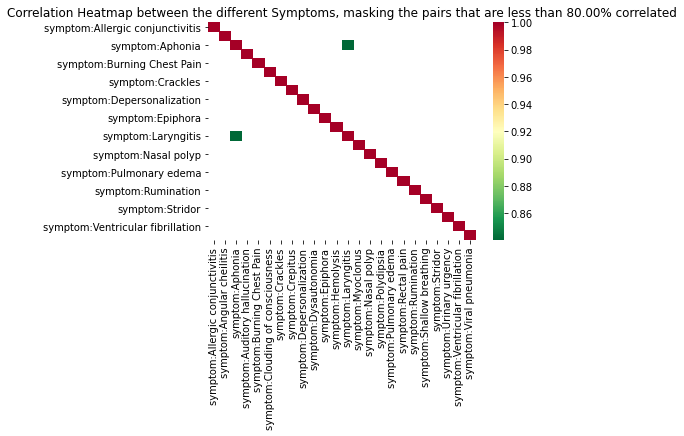

In [296]:
def remove_correlated_features(df, threshold = 0.8):
  # Create correlation matrix
  corr_matrix = df.corr().abs()

  # Plot
  seaborn.heatmap(corr_matrix, cmap='RdYlGn_r', mask = (np.abs(corr_matrix) <= threshold))
  plt.title('Correlation Heatmap between the different Symptoms, masking the pairs that are less than {:.2%} correlated'.format(threshold))
  plt.show()

  # Select upper triangle of correlation matrix
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

  # Find features with correlation greater than threshold
  to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

  # Drop features 
  df.drop(to_drop, axis=1, inplace=True)

  return df

df_1 = remove_correlated_features(df=df_1)

In [297]:
path = '/content/sample_data/aggregated_cc_by.csv'
df_2 = pd.read_csv(path, index_col=['date'], parse_dates=['date'])
df_2 = df_2.groupby('open_covid_region_code').resample('W').sum()  # resample to weekly for each region, by adding up daily counts
df_2.index = df_2.index.set_levels(df_2.index.levels[1].shift(1, freq='D'), level=1)  # shift by a day so that both dataframes coincide
hospitalization_ts = df_2['hospitalized_new']
df = df_1.join(hospitalization_ts, how='inner') # Merge the two datasets
df.head(100)

country_region_code country_region          sub_region_1 sub_region_1_code  symptom:Allergic conjunctivitis  symptom:Angular cheilitis  symptom:Aphonia  symptom:Auditory hallucination  symptom:Burning Chest Pain  symptom:Clouding of consciousness  symptom:Crackles  symptom:Crepitus  symptom:Depersonalization  symptom:Dysautonomia  symptom:Epiphora  symptom:Hemolysis  symptom:Myoclonus  symptom:Nasal polyp  symptom:Polydipsia  symptom:Pulmonary edema  symptom:Rectal pain  symptom:Rumination  symptom:Shallow breathing  symptom:Stridor  symptom:Urinary urgency  symptom:Ventricular fibrillation  symptom:Viral pneumonia  hospitalized_new
open_covid_region_code date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
US-AK                  2020-03-09                  US  United States                Alaska             US-AK                         0.253661                        NaN         0.189895                             NaN                         NaN                                NaN               NaN               NaN                        NaN              0.598775          0.143685                NaN           0.189821             0.273874                 NaN                 0.264706             0.139657            0.276139                   0.412863         0.840504                      NaN                               NaN                 0.670098               0.0
                       2020-03-16                  US  United States                Alaska             US-AK                         0.007085                        NaN         0.196864                             NaN                    0.417834                                NaN          0.456274               NaN                   0.168659              0.441041          0.097335           0.204909                NaN             0.254054                 NaN                 0.480882             0.173913            0.714477                   1.000000         0.732424                      NaN                               NaN                 1.000000               0.0
                       2020-03-23                  US  United States                Alaska             US-AK                              NaN                        NaN              NaN                        0.065826                    1.000000                                NaN          0.416350               NaN                        NaN              0.205207          1.000000           1.000000                NaN             0.085586                 NaN                 0.358824             0.039526            0.659517                   0.653527         0.513116                      NaN                          0.069176                 0.395991               0.0
                       2020-03-30                  US  United States                Alaska             US-AK                         0.041096                        NaN              NaN                        0.078431                    0.292994                           0.079176               NaN               NaN                   0.456839                   NaN          0.172654           0.175027           0.000000             0.206306            0.860000                 0.677941                  NaN            0.345845                   0.979253         0.687303                 0.650794                          0.076297                 0.126761   

In [298]:
rm_region_list = []

import math
for index, row in df.iterrows():
  x = row['hospitalized_new']
  if x < 0:
    if index[0] not in rm_region_list:
      rm_region_list.append(index[0])


# US-AK, US-HI, US-VT, US-WV

for region in rm_region_list:
  df = df.drop(index=region)

df.head(100)

country_region_code country_region          sub_region_1 sub_region_1_code  symptom:Allergic conjunctivitis  symptom:Angular cheilitis  symptom:Aphonia  symptom:Auditory hallucination  symptom:Burning Chest Pain  symptom:Clouding of consciousness  symptom:Crackles  symptom:Crepitus  symptom:Depersonalization  symptom:Dysautonomia  symptom:Epiphora  symptom:Hemolysis  symptom:Myoclonus  symptom:Nasal polyp  symptom:Polydipsia  symptom:Pulmonary edema  symptom:Rectal pain  symptom:Rumination  symptom:Shallow breathing  symptom:Stridor  symptom:Urinary urgency  symptom:Ventricular fibrillation  symptom:Viral pneumonia  hospitalized_new
open_covid_region_code date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
US-DC                  2020-03-09                  US  United States  District of Columbia             US-DC                         0.388889                   0.000000         0.981395                        0.141762                    0.303855                           0.954178          0.417062          0.141176                   0.419847              0.473881          0.682081           0.522831           0.132353             0.461972            0.527027                 0.790456             0.086849            0.017094                   0.732824         0.535637                 0.107266                          0.786486                 1.000000               0.0
                       2020-03-16                  US  United States  District of Columbia             US-DC                         0.315556                   0.372685         0.676744                        0.057471                    0.770975                           0.428571          0.421801          0.388235                   0.269720              0.190299          0.720617           0.429224           0.084559             0.233803            0.666667                 0.653527             0.191067            0.148148                   1.000000         0.939525                 0.186851                          0.289189                 0.889610               0.0
                       2020-03-23                  US  United States  District of Columbia             US-DC                         0.404444                   0.261574         0.425581                        0.383142                    1.000000                           0.832884          0.552133          0.418824                   0.391858              0.289179          0.666667           0.906393           0.691176             0.123944            0.423423                 1.000000             0.163772            0.287749                   0.679389         0.794816                 0.110727                          0.400000                 0.652597               0.0
                       2020-03-30                  US  United States  District of Columbia             US-DC                         0.605556                   0.678241         0.176744                        0.670498                    0.730159                           0.417790          1.000000          0.569412                   0.185751              0.065299          0.394990           0.605023           0.617647             0.509859            0.765766                 0.873444             0.136476            0.370370                   0.564122         0.349892                 0.553633                          0.416216                 0.436688   

# Task 2: Visualize and cluster the data

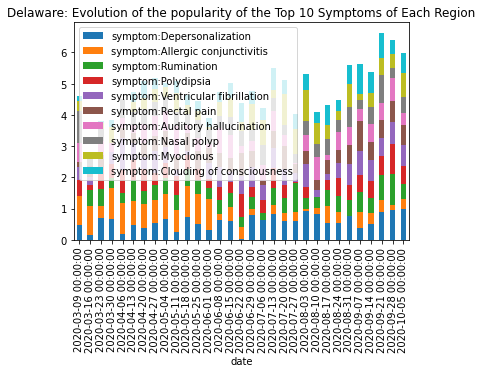

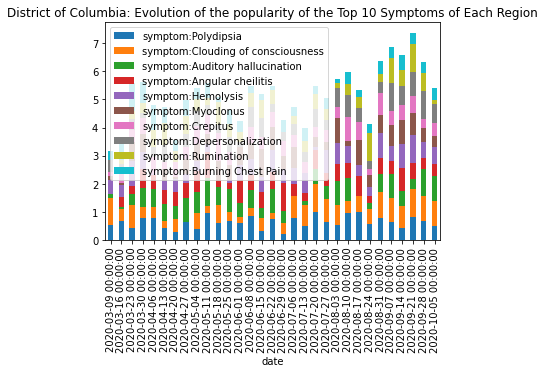

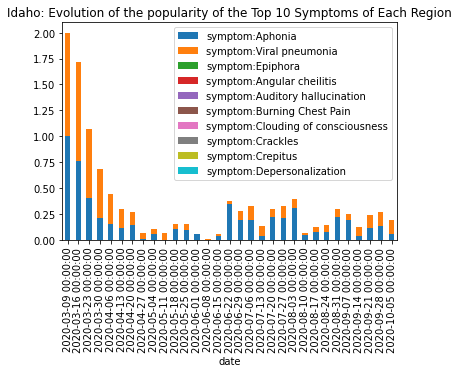

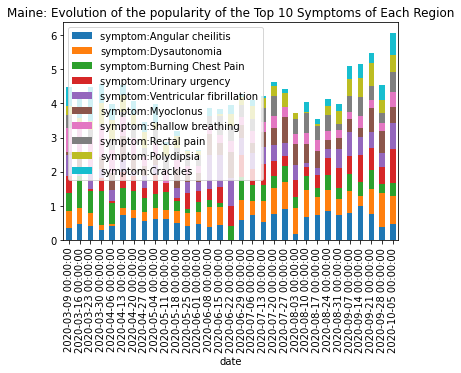

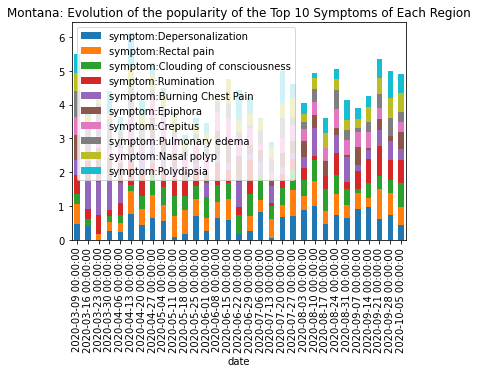

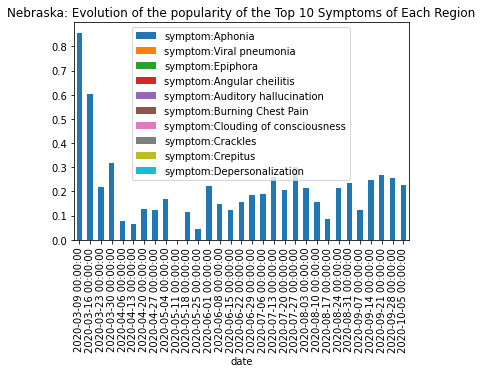

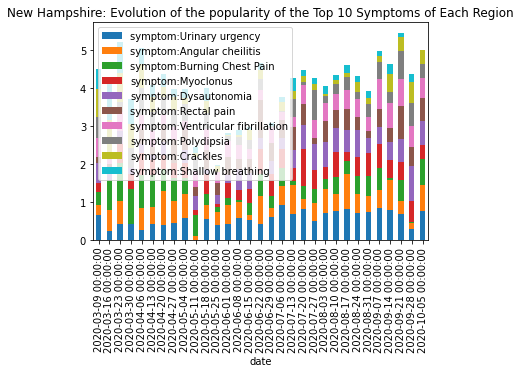

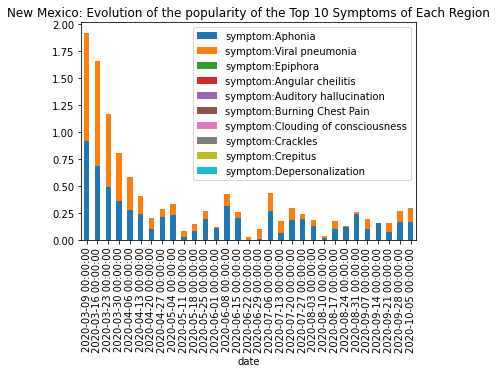

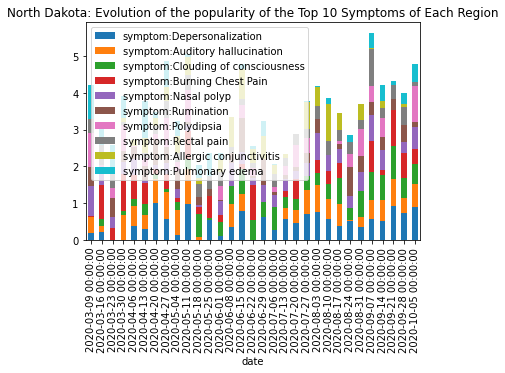

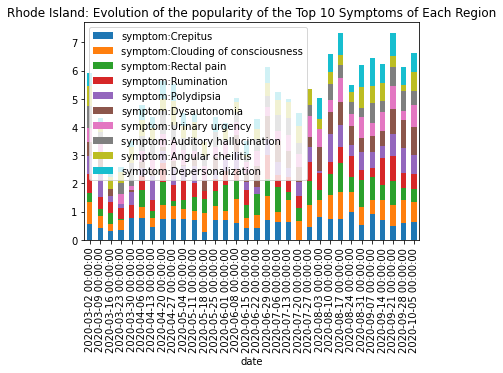

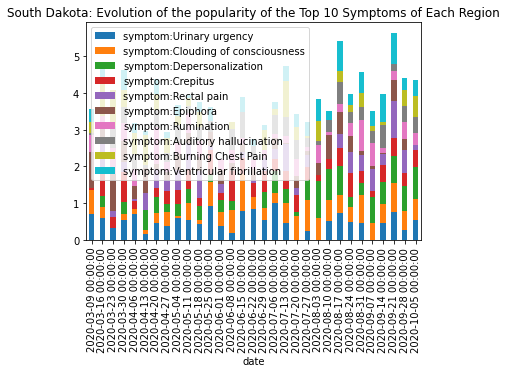

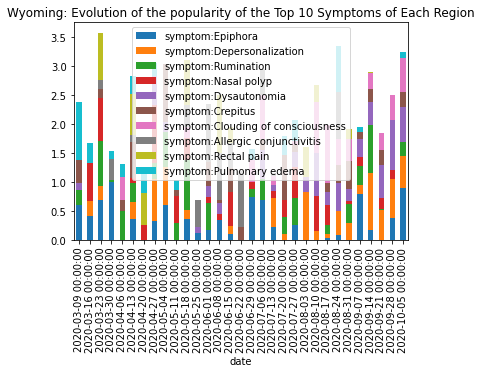

In [299]:
df.reset_index(inplace=True)
df.set_index('date', inplace= True)
# visualizing into a stacked bar chart
limit_per_region = 10  # to keep the most popular symtpoms per region
for region, group in df.groupby(['sub_region_1']):
    most_popular = group.filter(like='symptom:').sum(axis=0).sort_values(ascending=False).head(limit_per_region).index.to_list()
    most_popular.append('sub_region_1')
    group[most_popular].plot(kind='bar', stacked=True, title='{}: Evolution of the popularity of the Top 10 Symptoms of Each Region'.format(region))
    plt.show()

In [300]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = df.filter(like='symptom:').fillna(0).values
target = df['sub_region_1'].fillna(0).values
features = StandardScaler().fit_transform(features)  # standardize the data

 #PCA projection to 2D
pca = PCA(n_components=2)  
principal_components = pca.fit_transform(features)
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])
final_df = pd.concat([principal_df, pd.Series(target, name='target')], axis=1)
final_df.head(10)

,principal component 1,principal component 2,target
0,3.576787,4.995645,District of Columbia
1,3.672689,6.014841,District of Columbia
2,5.274480,4.195651,District of Columbia
3,5.275427,2.464438,District of Columbia
4,4.235496,0.504502,District of Columbia
5,2.573490,-0.511648,District of Columbia
6,1.473407,0.243210,District of Columbia
7,1.895202,-0.690240,District of Columbia
8,3.745026,-1.745915,District of Columbia
9,2.823771,-0.918946,District of Columbia


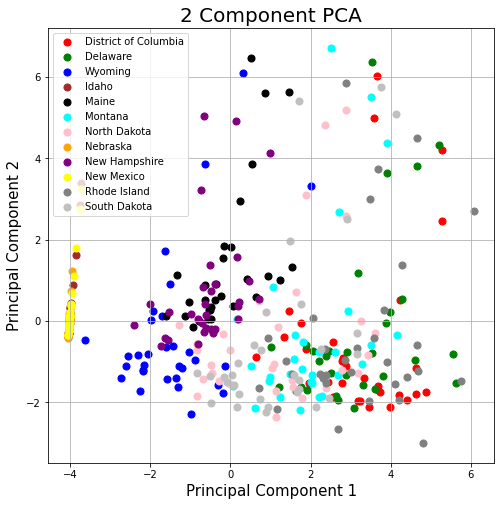

In [301]:
## do it on all states
fig = plt.figure(figsize(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ["District of Columbia", "Delaware", "Wyoming", "Idaho", "Maine", "Montana", "North Dakota", "Nebraska", "New Hampshire", "New Mexico", "Rhode Island", "South Dakota" ]
colors = ['red', 'green', 'blue', "brown", "black", "cyan", "pink", "orange", "purple", "yellow", "gray", "silver", "navy blue", "dark pink"]
for target, color in zip(targets, colors):
  indicesToKeep = final_df['target'] == target
  ax.scatter(final_df.loc[indicesToKeep, 'principal component 1'], final_df.loc[indicesToKeep, 'principal component 2'], c= color, s =50)

ax.legend(targets)
ax.grid()

Text(0.5, 1.0, 'Cluster labels for low-dimensional KMeans')

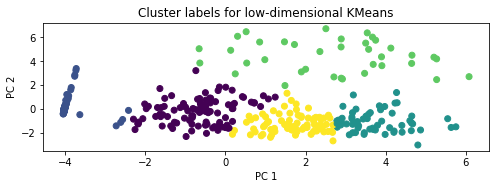

In [302]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans


## principal_components X_reduced
## features X

color_theme = np.array(['darkgray', 'powderblue'])

kmeans_low = KMeans(n_clusters=5, random_state=0)
kmeans_low.fit(principal_components)
y_pred_low = kmeans_low.predict(principal_components)

plt.subplot(3,1,2)
plt.scatter(principal_components[:,0], principal_components[:,1], c=y_pred_low)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Cluster labels for low-dimensional KMeans")



1 : 3.0475838665003683
2 : 2.0458736782417253
3 : 1.6160764890868784
4 : 1.100411448680347
5 : 0.9744456422264419
6 : 0.8948180671623098
7 : 0.839529713148236
8 : 0.7843061650875892
9 : 0.7432657049173907


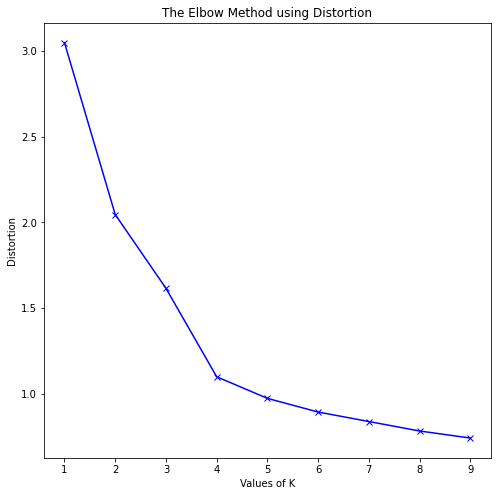

In [303]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 

X = principal_components
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_

for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

Text(0.5, 1.0, 'Cluster labels for high-dimensional KMeans')

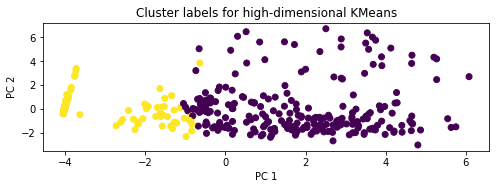

In [304]:

kmeans_high = KMeans(n_clusters=2, random_state=0)
kmeans_high.fit(features)
y_pred_high = kmeans_high.predict(features)

## swapping colors for the clusters for better comparison
relabel_y_pred_high = np.choose(y_pred_high, [1, 0]).astype(np.int64)
kmeans_high = KMeans(n_clusters=5, random_state=0)
kmeans_high.fit(features)
y_pred_high = kmeans_high.predict(features)

plt.subplot(3,1,2)
#plt.scatter(principal_components[:,0], principal_components[:,1], c=y_pred_high)
plt.scatter(principal_components[:,0], principal_components[:,1], c=relabel_y_pred_high)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Cluster labels for high-dimensional KMeans")

In [305]:
## compare the two plots
print(classification_report(relabel_y_pred_high, y_pred_low))

              precision    recall  f1-score   support

           0       0.66      0.28      0.39       240
           1       1.00      0.74      0.85       133
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.44       373
   macro avg       0.33      0.20      0.25       373
weighted avg       0.78      0.44      0.55       373




# Task 3: Supervised Learning

**TODO CROSS-VALIDATION SCHEMEEE**

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error 

**KNN**

In [255]:
# train-test split, for date first

df.reset_index(inplace=True)
df.set_index(['date', 'open_covid_region_code'], inplace=True) # index by date first, then region
df.sort_values(["date", "open_covid_region_code"], axis=0, 
                 ascending=True, inplace=True)

X = df.iloc[:, 4:] # those columns are not relevant features (region names and abbreviations)
X = X.loc[:, X.columns != 'hospitalized_new'] # we're trying to predict hospitalization cases
X = X.filter(like='symptom:').fillna(0).values # we're predicting using data from search trends dadaset (symptoms)
y = df['hospitalized_new'].fillna(0).values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

kf = KFold(n_splits=5) # Define the split - into 5 folds 

count = 0
for train_index, test_index in kf.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  print("Split Number: ", count)
  print("test_indexes start from: ", test_index[0])
  count += 1
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  # feature scaling
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # classifier
  classifier = KNeighborsClassifier(n_neighbors=5)
  classifier = classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)

  # Evaluate the algorithm
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

Split Number:  0
test_indexes start from:  0
[[31  1  1  1  0  2  0  0  6 11  0  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0

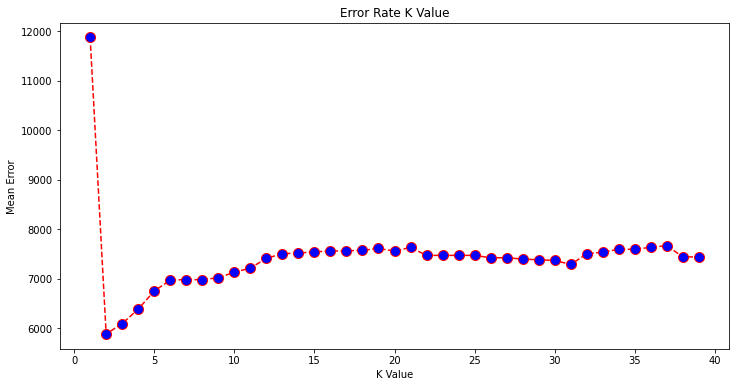

In [256]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
  sumError = 0
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    sumError += mean_squared_error(y_test, pred_i)
  error.append(sumError / 5.0)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [257]:
# Do the same, but split for region
df.reset_index(inplace=True)
df.set_index(['open_covid_region_code', 'date'], inplace=True) 
df.sort_values(["open_covid_region_code", "date"], axis=0, 
                 ascending=True, inplace=True)

print(df)

X = df.iloc[:, 4:] # those columns are not relevant features (region names and abbreviations)
X = X.loc[:, X.columns != 'hospitalized_new'] # we're trying to predict hospitalization cases
X = X.filter(like='symptom:').fillna(0).values # we're predicting using data from search trends dadaset (symptoms)

y = df['hospitalized_new'].fillna(0).values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

kf = KFold(n_splits=5) # Define the split - into 5 folds 

count = 0
for train_index, test_index in kf.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  print("Split Number: ", count)
  print("test_indexes start from: ", test_index[0])
  count += 1
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  # feature scaling
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # classifier
  classifier = KNeighborsClassifier(n_neighbors=5)
  classifier = classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)

  # Evaluate the algorithm
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

                                  country_region_code country_region          sub_region_1 sub_region_1_code  symptom:Allergic conjunctivitis  symptom:Angular cheilitis  symptom:Aphonia  symptom:Auditory hallucination  symptom:Burning Chest Pain  symptom:Clouding of consciousness  symptom:Crackles  symptom:Crepitus  symptom:Depersonalization  symptom:Dysautonomia  symptom:Epiphora  symptom:Hemolysis  symptom:Myoclonus  symptom:Nasal polyp  symptom:Polydipsia  symptom:Pulmonary edema  symptom:Rectal pain  symptom:Rumination  symptom:Shallow breathing  symptom:Stridor  symptom:Urinary urgency  symptom:Ventricular fibrillation  hospitalized_new
open_covid_region_code date                                                                                                                                                                                                                                                                                                                                   

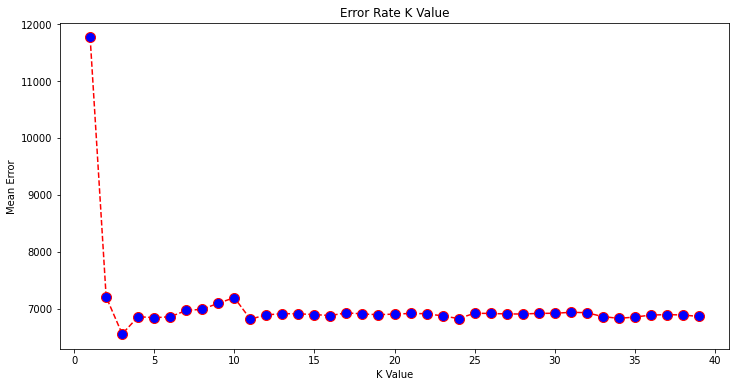

In [258]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
  sumError = 0
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    sumError += mean_squared_error(y_test, pred_i)
  error.append(sumError / 5.0)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

**Decision Trees**

In [259]:
from sklearn import tree

In [260]:
# train-test split, for date first

df.reset_index(inplace=True)
df.set_index(['date', 'open_covid_region_code'], inplace=True) # index by date first, then region
df.sort_values(["date", "open_covid_region_code"], axis=0, 
                 ascending=True, inplace=True)

X = df.iloc[:, 4:] # those columns are not relevant features (region names and abbreviations)
X = X.loc[:, X.columns != 'hospitalized_new'] # we're trying to predict hospitalization cases
X = X.filter(like='symptom:').fillna(0).values # we're predicting using data from search trends dadaset (symptoms)
y = df['hospitalized_new'].fillna(0).values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

kf = KFold(n_splits=5) # Define the split - into 5 folds 

count = 0
for train_index, test_index in kf.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  print("Split Number: ", count)
  print("test_indexes start from: ", test_index[0])
  count += 1
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  # feature scaling
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # classifier
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print("DecisionTreeClassifier converged on ", clf.get_depth(), "depth")

  # Evaluate the algorithm
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

Split Number:  0
test_indexes start from:  0
DecisionTreeClassifier converged on  28 depth
[[13  0  0  0  0 22 10  2  0  0  0  0  0  0  0  1  1  0  1  1  1  0  0  0
   1  0  1  1]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 1  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0

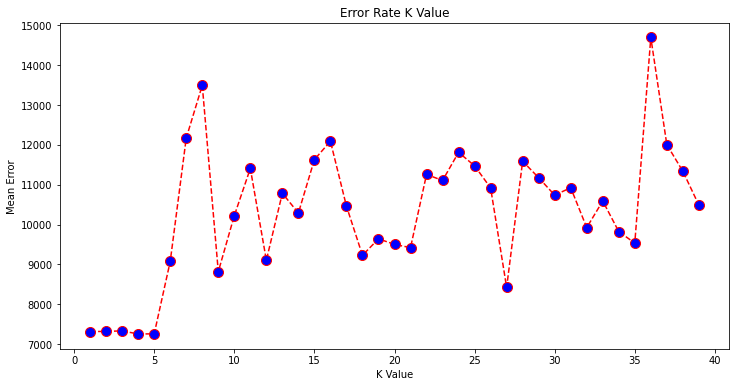

In [261]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
  sumError = 0
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = tree.DecisionTreeClassifier(max_depth = i)
    clf = clf.fit(X_train, y_train)
    pred_i = clf.predict(X_test)
    sumError += mean_squared_error(y_test, pred_i)
  error.append(sumError / 5.0)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [262]:
# Do the same but split for region

df.reset_index(inplace=True)
df.set_index(['date', 'open_covid_region_code'], inplace=True) # index by date first, then region
df.sort_values(["open_covid_region_code", "date"], axis=0, 
                 ascending=True, inplace=True)

X = df.iloc[:, 4:] # those columns are not relevant features (region names and abbreviations)
X = X.loc[:, X.columns != 'hospitalized_new'] # we're trying to predict hospitalization cases
X = X.filter(like='symptom:').fillna(0).values # we're predicting using data from search trends dadaset (symptoms)
y = df['hospitalized_new'].fillna(0).values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

kf = KFold(n_splits=5) # Define the split - into 5 folds 

count = 0
for train_index, test_index in kf.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  print("Split Number: ", count)
  print("test_indexes start from: ", test_index[0])
  count += 1
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  # feature scaling
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # classifier
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print("DecisionTreeClassifier converged on ", clf.get_depth(), "depth")

  # Evaluate the algorithm
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

Split Number:  0
test_indexes start from:  0
DecisionTreeClassifier converged on  27 depth
[[12  2  3 ...  2  2  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.86      0.18      0.30        65
         2.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         0
        12.0       0.00      0.00      0.00         1
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        17.0       0.00      0.00      0.00         1
        18.0       0.00      0.00      0.00         1
        20.0       0.00      0.00      0.00         1
        23.0       0.00      0.00      0.00         0
        27.0       0.00      0.00      0.00       

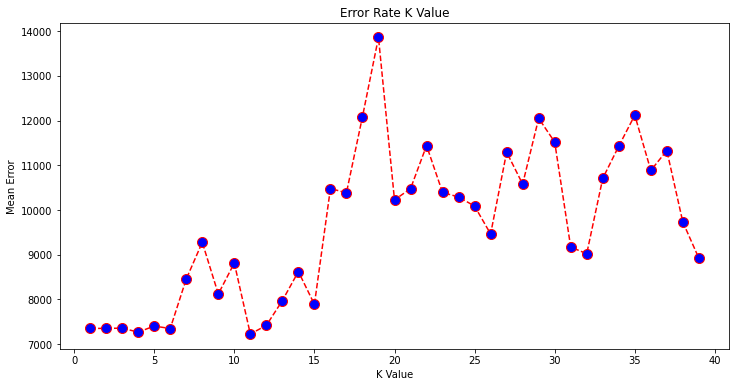

In [263]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
  sumError = 0
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = tree.DecisionTreeClassifier(max_depth = i)
    clf = clf.fit(X_train, y_train)
    pred_i = clf.predict(X_test)
    sumError += mean_squared_error(y_test, pred_i)
  error.append(sumError / 5.0)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

# A Third Methodology: Time Series Analysis

We will now attempt to forecast directly the target variable, i.e. the number of daily new hospitlalization cases (not compounded) in the USA, `hospitalized_new`. Many papers have already investigated modeling COVID cases using models such as ARIMA among others, including [[1]](https://ui.adsabs.harvard.edu/abs/2020arXiv200407859T/abstract), [[2]](https://www.medrxiv.org/content/10.1101/2020.06.11.20128991v1), [[3]](https://www.medrxiv.org/content/10.1101/2020.09.09.20191494v1), [[4]](https://www.researchsquare.com/article/rs-39149/v1). We perform this kind of analysis because intuitively, the change in hospitalization cases is *over time* thus is (mostly) progressive i.e. trends, as well as seasonal and cyclical. Models such as KNN and Decision Trees discard the time component and the potential features we can extract from it (seasonality etc.), therefore we can use Time Series Analysis to exploit them and build a more robust forecasting model.

Let us gather our data again, without the weekly aggregation that we performed on the data set. 




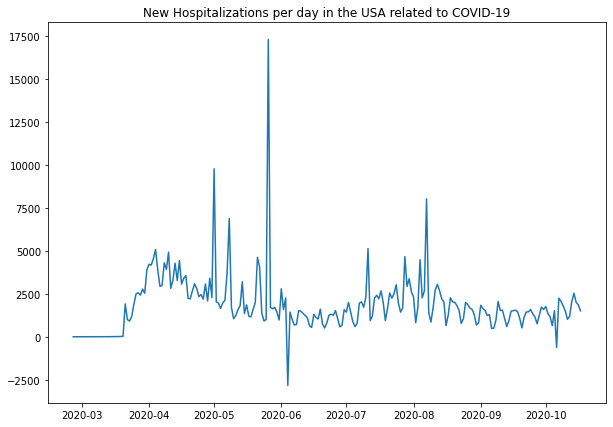

In [264]:
url = '/content/sample_data/national-history.csv'
df = pd.read_csv(url, index_col=['date'], parse_dates=['date'])
hospitalization_ts = df['hospitalizedIncrease']
hospitalization_ts.sort_index(inplace=True)
hospitalization_ts = hospitalization_ts[hospitalization_ts.index > '2020-02-25']
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(hospitalization_ts)
plt.title('New Hospitalizations per day in the USA related to COVID-19')
plt.show()

## Time Series Model Selection

Before going any further into our analysis, our series has to be made stationary i.e. its statitical properties are constant (mean, variance, autocorrelation). To do so, we perform an **Augmented Dickey-Fuller Test**, which tests the null hypothesis that there is a unit root in a univariate process in the presence of serial correlation. If the pvalue is above a critical size, then we cannot reject that there is a unit root. 

In [265]:
from statsmodels.tsa.stattools import adfuller
def adfuller_with_description(ts):
  result = adfuller(ts, autolag='AIC')
  print(f'ADF Statistic: {result[0]}')
  print(f'p-value: {result[1]}')
  for key, value in result[4].items():
      print('Critial Values:')
      print(f'   {key}, {value}')

adfuller_with_description(hospitalization_ts)

ADF Statistic: -2.9173585316630457
p-value: 0.0433663531475396
Critial Values:
   1%, -3.4596204846395824
Critial Values:
   5%, -2.8744153028455948
Critial Values:
   10%, -2.5736320761218576


The p-value is slightly below the significance level of 0.05, therefore we can reject the null hypothesis and confirm the time series is **stationary**. Therefore, we can fit now fit an ARIMA model to our dataset. 


## Parameter Estimation

An ARIMA model has parameters p, d, and q, where p represents the order of the AR part, d the order of differencing (“I” part), and q the order of the MA term Now, we need to **optimize** those parameters. The `auto_arima` function of the `pmdarima` library tests the time series with different combinations of p, d, and q using the Akaike Information Criterion (AIC for short), which estimates the relative amount of information lost by the model.

In [266]:
import pmdarima as pmd

# split into train-test set (to avoid data snooping when evaluating accuracy later on)
size = int(len(hospitalization_ts) * 0.80)
train, test = hospitalization_ts[:size], hospitalization_ts[size:]

arima_model = pmd.auto_arima(train, start_p=1, start_q=1, test="adf", trace=True)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3321.063, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3415.453, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3373.432, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3319.063, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3413.457, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3321.062, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3322.801, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3317.187, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3320.442, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3319.269, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3371.434, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3320.923, Time=0.16 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.584 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  188
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1656.593
Date:                Thu, 22 Oct 2020   AIC                           3317.187
Time:                        03:28:26   BIC                           3323.649
Sample:                             0   HQIC                          3319.805
                                - 188                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8318      0.044    -18.824      0.000      -0.918      -0.745
sigma2      2.888e+06    7.6e+04     37.980      0.000    2.74e+06    3.04e+06
===================================================================================
Ljung-Box (Q):                       44.81   Jarque-Bera (JB):             10454.43
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               2.06   Skew:                             4.35
Prob(H) (two-sided):                  0.01   Kurtosis:                        38.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

According to the optimizer, ARIMA(0,1,1) is the best fitted model. To observe the fit:

In [267]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(train, order=(0, 1, 1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                               ARIMA Model Results                                
Dep. Variable:     D.hospitalizedIncrease   No. Observations:                  187
Model:                     ARIMA(0, 1, 1)   Log Likelihood               -1656.739
Method:                           css-mle   S.D. of innovations           1698.449
Date:                    Thu, 22 Oct 2020   AIC                           3319.478
Time:                            03:28:27   BIC                           3329.172
Sample:                        02-27-2020   HQIC                          3323.406
                             - 08-31-2020                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            7.5164     21.382      0.352      0.725     -34.391      49.424
ma.L1.D.hospitalizedIncrease    -0.8325      

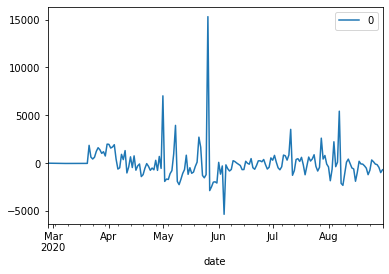

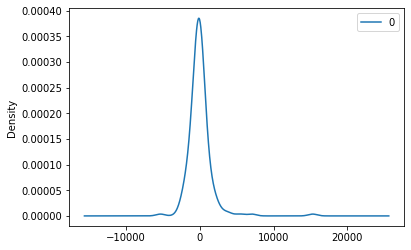

                  0
count    187.000000
mean       0.029221
std     1703.009366
min    -5350.868833
25%     -673.539833
50%      -40.362695
75%      379.786820
max    15306.389223


In [268]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

`ref: https://otexts.com/fpp2/residuals.html`

A good forecasting method will yield residuals with the following properties:

* The residuals are uncorrelated. If there are correlations between residuals, then there is information left in the residuals which should be used in computing forecasts. This is true, since the line plot of the residual errors shows that the variation of the residuals stays much the same across the historical data, apart from the one outlier, and therefore the residual variance can be treated as constant.

* The residuals have zero mean. If the residuals have a mean other than zero, then the forecasts are biased. This is true since the density plot of the residual error values suggests the errors are Gaussian, with a mean close to zero

Therefore, we have ensured that we picked a good model and parameters, so we can move on to the fun part: prediction.

## Model Prediction

Now, we can use ARIMA to forecast future time steps.

on 2020-09-01 00:00:00, predicted=1402.922270, expected=1837.000000
on 2020-09-02 00:00:00, predicted=1486.763459, expected=1647.000000
on 2020-09-03 00:00:00, predicted=1522.535605, expected=1536.000000
on 2020-09-04 00:00:00, predicted=1532.950995, expected=1239.000000
on 2020-09-05 00:00:00, predicted=1490.274006, expected=1287.000000
on 2020-09-06 00:00:00, predicted=1462.915041, expected=489.000000
on 2020-09-07 00:00:00, predicted=1301.558873, expected=492.000000
on 2020-09-08 00:00:00, predicted=1166.472871, expected=959.000000
on 2020-09-09 00:00:00, predicted=1135.817709, expected=2060.000000
on 2020-09-10 00:00:00, predicted=1303.284688, expected=1532.000000
on 2020-09-11 00:00:00, predicted=1349.488292, expected=1553.000000
on 2020-09-12 00:00:00, predicted=1391.439070, expected=1076.000000
on 2020-09-13 00:00:00, predicted=1344.098414, expected=592.000000
on 2020-09-14 00:00:00, predicted=1220.951738, expected=937.000000
on 2020-09-15 00:00:00, predicted=1177.821315, expect

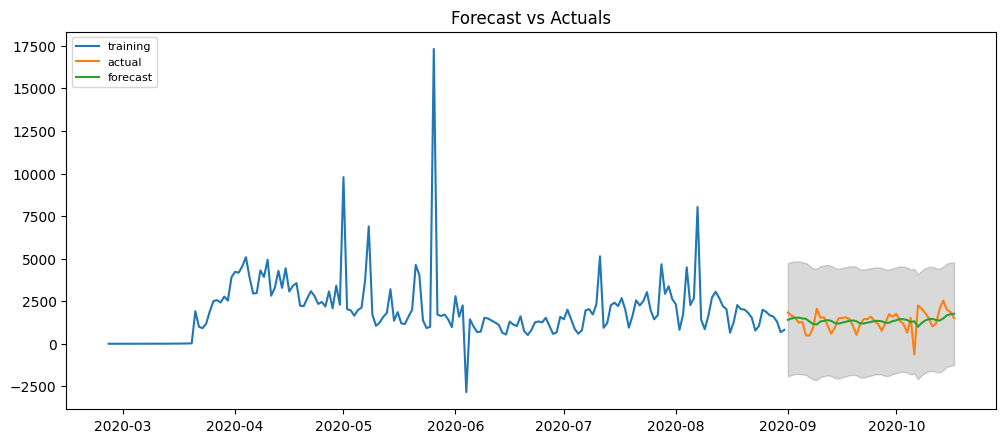

In [269]:
history = [x for x in train]
predictions, lower_series, upper_series = pd.Series(), pd.Series(), pd.Series()
for t in range(len(test)):
  date = test.index[t]
  model = ARIMA(history, order=(0, 1, 1))
  model_fit = model.fit(disp=0)
 
  # Forecast
  fc, se, conf = model_fit.forecast()
  predictions[date] = fc
  history.append(test[t])
  lower_series[date], upper_series[date] = conf[0][0], conf[0][1]

  print('on %s, predicted=%f, expected=%f' % (str(date), fc, test[t]))

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(predictions, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The commonly used accuracy metrics to judge forecasts are:

1. Mean Absolute Percentage Error (MAPE)
2. Mean Error (ME)
3. Mean Absolute Error (MAE)
4. Mean Percentage Error (MPE)
5. Root Mean Squared Error (RMSE)
6. Lag 1 Autocorrelation of Error (ACF1)
7. Correlation between the Actual and the Forecast (corr)
8. Min-Max Error (minmax)

In [270]:
# Accuracy metrics
from statsmodels.tsa.stattools import acf

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return {'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax}
import warnings
warnings.filterwarnings('ignore')
results = forecast_accuracy(predictions.astype(float32), test.values)
print(results)
print('We observe a MAPE of {}, meaning we reached an accuracy of about {:.2%}'.format(results['mape'], 1 - results['mape']))

{'mape': 0.4167056221591714, 'me': -3.326100450880984, 'mae': 417.8982725752161, 'mpe': 0.058429615139319775, 'rmse': 559.3835804915932, 'acf1': 0.23495521691735216, 'corr': 0.030275116647135888, 'minmax': 0.26436312868356826}
We observe a MAPE of 0.4167056221591714, meaning we reached an accuracy of about 58.33%


Using Time Series analysis as an alternative to KNNs and Decision Trees, we have reached a higher accuracy. 

When forecasting all points from the start of the test set, we reach the following results:

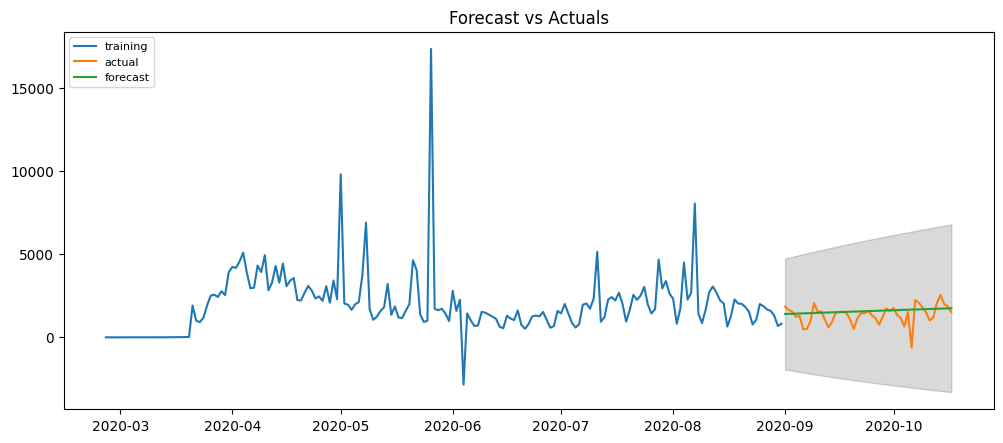

We observe a MAPE of 0.4618915415561301, meaning we reached an accuracy of about 53.81%


In [271]:
model = ARIMA(train, order=(0, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(len(test), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
results = forecast_accuracy(fc_series.astype(float32), test.values)
print('We observe a MAPE of {}, meaning we reached an accuracy of about {:.2%}'.format(results['mape'], 1 - results['mape']))